# PyCUDA与图像处理-直方图

In [1]:
import pycuda.autoinit
import pycuda.driver as drv
import numpy as np
from pycuda.compiler import SourceModule
import string
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import  animation

In [2]:
def load_kernel_from_file(fname,kname):
    sources = None
    kernel = None
    with open(fname,encoding='utf-8') as f:
        sources = f.read() # 通过str函数转换为unicode编码
        sm = SourceModule(str(sources))
        kernel = sm.get_function(kname)
    return kernel

def load_kernel_from_string(sources,kname):
    sm = SourceModule(str(sources))
    kernel = sm.get_function(kname)
    return kernel

In [4]:
histogram = load_kernel_from_file('../../datas/cuda/07-histogram.cu','histogram')

In [5]:
src = cv2.imread('../../datas/f2.jpg',0)

In [8]:
histval = np.zeros((256,),np.int32)

In [9]:
rows,cols = src.shape
block = (32,32,1)
grid = (int(cols / block[0] ),int(rows / block[1]),1)

print('block = ',block)
print('grid = ',grid)

block =  (32, 32, 1)
grid =  (20, 15, 1)


In [10]:
histogram(drv.In(src),drv.Out(histval),grid=grid,block=block)

Text(0.5,1,'Histogram')

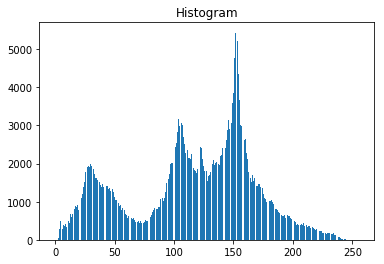

In [12]:
plt.bar(np.arange(0,256),histval)
plt.title('Histogram')